# Week 8 Comparing Alternative Models 📊
# Tutorial Module

In the preceding modules, you have been introduced to the foundational concept of binary classification using logistic regression. While this methodology stands as a cornerstone in many machine learning applications, the field presents a plethora of alternative techniques, each tailored to specific challenges and data structures.

In this chapter, we shall investigate other models by acquainting you with three other common techniques:

<span style="background-color: #AFEEEE">**Decision Trees**</span>: Decision trees posses structure akin to family or phylogeny trees and school project flowcharts, allows for easy visualization and interpretation of the model's decisions. Decision Trees mirror our everyday decision-making, like choosing clothes based on the weather. This process, where each choice leads to further options, forms a tree-like structure, culminating in a final decision at the tree's leaves.

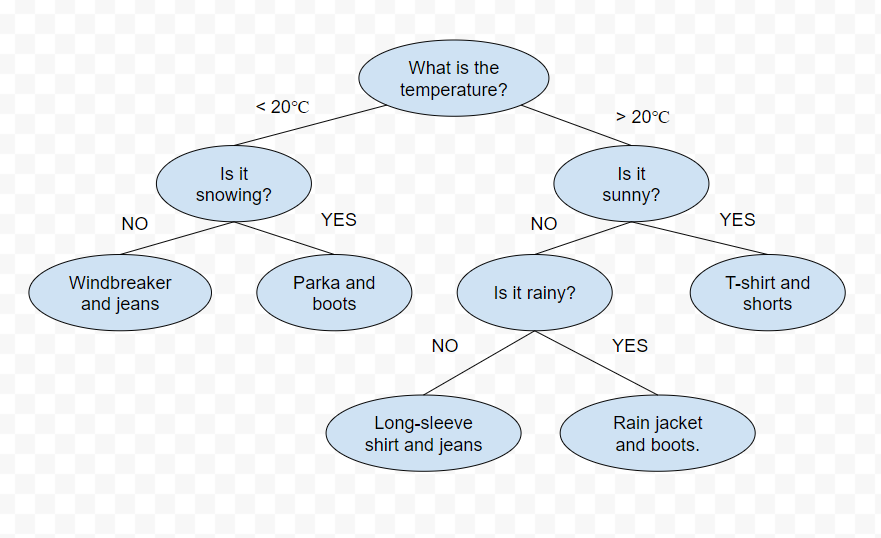


<span style="background-color: #AFEEEE">**Random Forests**</span>: Building upon the foundation of decision trees, the Random Forest technique is an "ensemble" method. It involves the generation of multiple decision trees and aggregates their outputs to produce a refined classification. This aggregation not only bolsters the robustness of the model but also counteracts the overfitting tendencies observed in standalone decision trees.

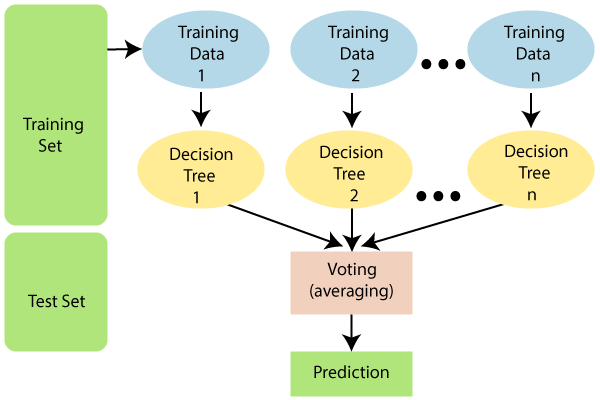


<span style="background-color: #AFEEEE">**Support Vector Machines (SVM)**</span>: Rooted in geometry, SVMs aim to pinpoint the hyperplane that optimally separates the classes in a dataset. This hyperplane is strategically chosen to maximize the margin between the two classes, ensuring an optimal class separation. Within the realm of classification, when SVMs are applied to linearly separable data for binary classification, the specific SVM model used is often referred to as a Support Vector Classifier (SVC).

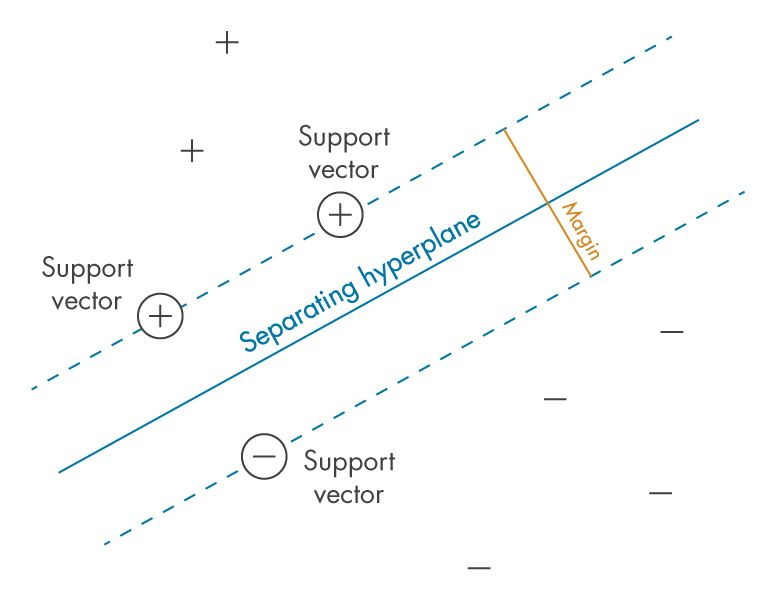

Each subsequent section will expand upon the mathematical foundations, algorithmic intricacies, and practical applications of these methods. Furthermore, we will dissect the comparative advantages and limitations of each technique, equipping you with a holistic understanding to make informed decisions in real-world scenarios. By the end of this chapter, it is anticipated that you will not only broaden your arsenal of binary classification techniques but will also possess the acumen to judiciously select and apply the most apt method to a given challenge.

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Data Preprocessing: Setting the Stage for Advanced Classification Techniques

Before we delve into the intricacies of the aforementioned machine learning models, it is paramount to ensure that our data is appropriately preprocessed. The quality of the data and the manner in which it's prepared directly influences the performance of machine learning models. The following steps elucidate the preprocessing techniques applied to our dataset:

<span style="background-color: #AFEEEE">1. **Data Acquisition and Initial Cleanup**</span>: The dataset, `breast-cancer.csv`, is read into a DataFrame. The `id` column, which presumably serves as a unique identifier for each record, is dropped. Such identifiers typically don't provide any predictive power and can be safely omitted.

In [ ]:
df = pd.read_csv("./breast-cancer.csv")
df = df.drop(columns="id")

<span style="background-color: #AFEEEE">2. **Class Label Encoding**</span>: The `diagnosis` column, which contains the labels for our classification task, is transformed. Benign tumors (`B`) are encoded as `0`, and malignant tumors (`M`) are encoded as `1`. This transformation converts categorical labels into a format suitable for machine learning algorithms.

In [ ]:
target = df["diagnosis"]
target = target.replace({'B':0,'M':1})

<span style="background-color: #AFEEEE">3. **Handling Class Imbalances**</span>: Class imbalances can bias the model towards the majority class, leading to sub-optimal performance. To address this, class weights are computed. In this specific code, a uniform weight of `0.5` is assigned to both classes, though in a broader context, different weights might be computed based on class distribution.

In [ ]:
# Calculate class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(target), y=target)

# Create a dictionary mapping class index to its weight
class_weight_dict = dict(enumerate(class_weights))

<span style="background-color: #AFEEEE">4. **Data Partitioning:**</span> The dataset is divided into a training set and a testing set using a 75-25 split. This means 75% of the data is used for training the model, and 25% is set aside for evaluating its performance.

In [ ]:
predictors = df.drop(['diagnosis'], axis = 1)
# Splitting training and testing set
train_inputs, test_inputs, train_targets, test_targets = train_test_split(predictors, target, test_size=0.25, random_state=42)

<span style="background-color: #AFEEEE">5. **Feature Scaling**</span>: To ensure that no particular feature dominates the model due to its scale, the features are standardized. This process transforms the features to have a mean of `0` and a standard deviation of `1`. The scaling parameters (mean and standard deviation) are computed using the training data and then applied to both the training and testing sets.

In [ ]:
# Scaling the features
sc = StandardScaler()
train_scaled = sc.fit_transform(train_inputs.astype(float, 64))
test_scaled = sc.transform(test_inputs.astype(float, 64))
test_scaled = pd.DataFrame(test_scaled, columns=train_inputs.columns)
train_scaled = pd.DataFrame(train_scaled, columns=test_inputs.columns)

<span style="background-color: #AFEEEE">6. **Addressing Multicollinearity**</span>: Multicollinearity arises when two or more features are highly correlated, meaning one can be linearly predicted from the others. Such features can destabilize some machine learning models. To mitigate this, certain features (`perimeter_mean`, `area_mean`, `compactness_mean`, etc.) are dropped from the dataset.

In [ ]:
# Feature selection for models affected by multicollinearity
train_scaled_fs = train_scaled.drop(['perimeter_mean', 'area_mean', 'compactness_mean', 'perimeter_se', 'area_se', 'compactness_se', 'perimeter_worst', 'area_worst', 'compactness_worst'], axis = 1)
test_scaled_fs = test_scaled.drop(['perimeter_mean', 'area_mean', 'compactness_mean', 'perimeter_se', 'area_se', 'compactness_se', 'perimeter_worst', 'area_worst', 'compactness_worst'], axis = 1)

## Decision Trees
These are hierarchical models that partition data into subsets based on the value of input attributes. Envision a decision-making flowchart where each branching point is determined by the value of a particular attribute. The terminal leaves of this tree signify the final classification decision. These structures are common in any sort of planning or description of hierarchies, from family or even phylogeny trees to constructions of flowcharts for a school project. We may visualize the decisions chosen by our model in such a format, offering easy interpretability.

<span style="background-color: #AFEEEE">1. **Nodes and Branches**</span>: At each node, the tree asks a question about a specific feature: "Is feature A greater than a certain value?" Depending on the answer, it follows the corresponding branch to the next node, where another question is posed.

<span style="background-color: #AFEEEE">2. **Splitting Criteria**</span>: The questions posed at each node are not arbitrary. The tree intelligently determines which questions to ask and in which sequence, with the goal of efficiently categorizing the data. For this model to make "decisions", it aims to evaluate the "quality" of a potential split by assessing how well the split segregates the data into clear classes. The choice between these criteria often depends on the specific algorithm implementation and the nature of the data which we will not be diving into.

<span style="background-color: #AFEEEE">3. **Termination**</span>: As decisions are made and branches are followed, the tree eventually arrives at a terminal node, also known as a leaf. Here, a final classification or prediction is made. The journey from the root of the tree to a leaf represents a unique path of decisions leading to that specific outcome.

One of the standout features of Decision Trees is their visual nature. Once trained, the model can be illustrated as a tree diagram, providing a clear, interpretable map of the decision-making process. This makes them particularly valuable in situations where understanding the model's logic is crucial. As for hyperparamters, it's essential to understand that while these criteria guide the tree-building process, other factors, like tree depth and minimum samples required at a leaf, also play pivotal roles in determining the final structure of the Decision Tree. Below is an implementation of a decision tree with a max depth of 1, so one root and two leaf nodes.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import tree
from sklearn.model_selection import GridSearchCV

random_state = 0

dt = tree.DecisionTreeClassifier(random_state=random_state)

criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12,14]
class_weight = [None, 'balanced']

parameters = dict(criterion=criterion,
                  max_depth=[1],
                  class_weight=class_weight)

clf_GS = GridSearchCV(dt, parameters)
clf_GS.fit(train_scaled_fs, train_targets)

print(f"Best Criterion: {clf_GS.best_estimator_.get_params()['criterion']}")
print(f"Best max_depth: {clf_GS.best_estimator_.get_params()['max_depth']}")
print(f"Best class weighting: {clf_GS.best_estimator_.get_params()['class_weight']}")
print(f"{clf_GS.best_estimator_.get_params()}")
print("\n")

clf_GS.score(train_scaled_fs, train_targets)
clf_GS.score(test_scaled_fs, test_targets)

test_pred = clf_GS.predict(test_scaled_fs)

# Calculating evaluation metrics
acc = accuracy_score(test_targets, test_pred)
precision = precision_score(test_targets, test_pred, average='weighted')
recall = recall_score(test_targets, test_pred, average='weighted')
f1 = f1_score(test_targets, test_pred, average='weighted')
conf = confusion_matrix(test_targets, test_pred)

# Replace 'clf_GS' with your GridSearchCV object's name if different
best_model = clf_GS.best_estimator_

# Retrieve class labels
labels = np.where(best_model.classes_ == 1, 'malignant', 'benign')

# Create the confusion matrix display
display = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=labels)

# Evaluation metrics
eval_metrics = pd.Series({
    "Accuracy": acc,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

print(f"Model: {type(best_model).__name__}")
print(f"\nEvaluation metrics:\n{eval_metrics}")

# Plot the confusion matrix
display.plot()

**Q1. Here, you will see what feature the dataset was split on, and in this case, it is the average number of concave points of the cells in the sample. If this value was below a certain value, there was a higher probablity that the tissue the sample belonged to was benign. From a biological interpretation perspective, why do you think this is the case?**

<span style="background-color: #FFD700">**Write Answer Here**</span> 

**Q2. Please go back to the decision tree model and edit the `max_depth` hyperparameter from [1] to `max_depth`. Then observe the decision tree again below.**

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_GS.best_estimator_,
                   feature_names=train_scaled_fs.columns.tolist(),
                   class_names=['B', 'M'],
                   filled=True,
                   fontsize=12)

As you can see, now that we have changed the max depth of the tree to no longer be 1, the decision tree obviously branches more than once. At each subsequent node, although less information is provided by splitting on this feature than the feature previous, it still helps categorize each entry and future predictions better. Reviewing the confusion matrix reflects this improvement as you may observe the fewer errrors in its prediction.

## Random Forests

In the realm of machine learning, one might wonder if there's a way to amplify the strengths of a single model while minimizing its weaknesses. Enter Random Forests, a robust ensemble learning method designed to improve the performance of a basic building block: the Decision Tree.

The philosophy behind Random Forests is rooted in a simple yet powerful proverb: "Two heads are better than one." But what if, instead of two, we had a multitude (a forest) of "heads" (or trees) collectively making decisions? Each tree brings its perspective, derived from a random subset of the data and features, and together, they vote to produce a final verdict. This collaborative decision-making process often results in more accurate and stable predictions.

### Key Concepts of Random Forests:

<span style="background-color: #AFEEEE">1. **Ensemble Learning**</span>: Random Forests embody the principle of ensemble learning, where multiple models (in this case, trees) are trained and their predictions are aggregated. This aggregation reduces the variance, making the final model less susceptible to the overfitting that can plague individual Decision Trees.

<span style="background-color: #AFEEEE">2. **Bootstrap Aggregating (Bagging)**</span>: Each tree in a Random Forest is trained on a random subset of the data, chosen with replacement. This process, known as bootstrapping, ensures that trees are exposed to different parts of the dataset, encouraging diverse perspectives within the forest.

<span style="background-color: #AFEEEE">3. **Feature Randomness**</span>: Not only is the data randomly sampled, but at each split in a tree, a random subset of features is considered. This added layer of randomness ensures that the trees are de-correlated and that they don't all follow the same dominant patterns in the data.

<span style="background-color: #AFEEEE">4. **Voting Mechanism**</span> Once each tree in the forest has made its decision, it's time for the collective verdict. For classification tasks, this is typically done by a majority vote, while for regression, it's an average of the outputs.

Below is the implementation using scikit-learn.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

random_state = 0

dt = RandomForestClassifier(random_state=random_state)

criterion = ['gini', 'entropy', 'log_loss']
n_estimators = range(100, 300, 10)
max_depth = [2,4,6,8,10,12,14]
class_weight = [None, 'balanced']

parameters = dict(criterion=criterion,
                  max_depth=max_depth,
                  class_weight=class_weight)

clf_GS = GridSearchCV(dt, parameters)
clf_GS.fit(train_scaled, train_targets)

print(f"Best Criterion: {clf_GS.best_estimator_.get_params()['criterion']}")
print(f"Best max_depth: {clf_GS.best_estimator_.get_params()['max_depth']}")
print(f"Best class weighting: {clf_GS.best_estimator_.get_params()['class_weight']}")
print(f"{clf_GS.best_estimator_.get_params()}")
print("\n")

clf_GS.score(train_scaled, train_targets)
clf_GS.score(test_scaled, test_targets)

test_pred = clf_GS.predict(test_scaled)

# Replace 'clf_GS' with your GridSearchCV object's name if different
best_model = clf_GS.best_estimator_

# Calculating evaluation metrics
acc = accuracy_score(test_targets, test_pred)
precision = precision_score(test_targets, test_pred, average='weighted')
recall = recall_score(test_targets, test_pred, average='weighted')
f1 = f1_score(test_targets, test_pred, average='weighted')
conf = confusion_matrix(test_targets, test_pred)

# Retrieve class labels
labels = np.where(best_model.classes_ == 1, 'malignant', 'benign')

# Create the confusion matrix display
display = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=labels)

# Evaluation metrics
eval_metrics = pd.Series({
    "Accuracy": acc,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

print(f"Model: {type(best_model).__name__}")
print(f"\nEvaluation metrics:\n{eval_metrics}")

# Plot the confusion matrix
display.plot()

Unfortunately, a downside of using an ensemble of Decision Trees versus just one is the difficulty for someone to visualize the decisions due to the sheer number of models in the ensemble. However what Random Forests lack in interpretability is made up through performance. In our example, the data is already very seperable between the two classes given a simple Decision Tree model (or most models in general); thus, applying a Random Forest model here does not improve it by much.

**Q3. Explain why the bootstrap aggregating (bagging) algorithm typically involves sampling with replacement. What potential drawbacks might occur if sampling without replacement was used instead**

<span style="background-color: #FFD700">**Write Answer Below**</span> 

## Support Vector Machines

Support Vector Machines (SVMs), especially when utilized for classification tasks, represent an advanced paradigm in the realm of machine learning algorithms. By harmoniously fusing geometric principles with optimization techniques, SVMs provide a rigorous approach to the classification conundrum. When data is represented in a multi-dimensional space, one can envision the task of classification as finding a separating boundary. For linearly separable datasets, this boundary manifests as a hyperplane that distinctly divides the classes.

<img src="image-1.gif" alt="Drawing" style="width: 500px;"/>

The distinguishing characteristic of SVMs is their pursuit of the *optimal* hyperplane, defined as the hyperplane that maintains the maximum possible distance from the nearest data points of both classes. These salient data points, lying closest to the boundary, are designated as "support vectors." In simple terms, SVM tries to find a line (or a flat surface in more complex cases) that separates the data points. Whether a data point is labeled one class or the other depends on which side of the line it's on.

### Intuition

Consider an expansive terrain where two distinct groups of objects are scattered. The objective is to delineate a boundary ensuring distinct segregation. Naturally, one would opt for a boundary that maximizes the distance from the closest objects of both groups. In the SVM context, this "boundary" is the hyperplane, and the "objects" of the nearest proximity to it are the support vectors.

#### [Insert Figure: An illustrative analogy of SVM's principle using real-world objects on a terrain.]

<img src="svmimage1.png" alt="Drawing" style="width: 350px;"/>

The elegance of Support Vector Machines lies in their their foundational principle of maximizing margins, establishes them as a staple instrument in the classification toolkit. Below is an example of its implementation for our dataset.

In [ ]:
from sklearn.svm import SVC

svc_param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

svc_model = GridSearchCV(SVC(), svc_param_grid, refit = True)
svc_model.fit(train_scaled_fs, train_targets)
best_svc = svc_model.best_estimator_
svc_pred = best_svc.predict(test_scaled_fs)

# Retrieve class labels
labels = np.where(best_svc.classes_ == 1, 'malignant', 'benign')

# Calculating evaluation metrics
acc = accuracy_score(test_targets, svc_pred)
precision = precision_score(test_targets, svc_pred, average='weighted')
recall = recall_score(test_targets, svc_pred, average='weighted')
f1 = f1_score(test_targets, svc_pred, average='weighted')
conf = confusion_matrix(test_targets, svc_pred)

# Create the confusion matrix display
display = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=labels)

# Evaluation metrics
eval_metrics = pd.Series({
    "Accuracy": acc,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1
})

print(f"Model: {type(best_svc).__name__}")
print(f"\nEvaluation metrics:\n{eval_metrics}")

# Plot the confusion matrix
display.plot()

Once again, the model preforms really well. But what if we want to see how the data seperates visually? Intuitively, we would follow the 2D example and try to plot the data in a scatterplot, but clearly, we have way more than two features. As a solution to circumvent this, we can turn to Principal Component Analysis, a dimensionality reduction technique that is also a form of unsupervised learning.

**Q4. You may have noticed that the representation of the SVM for a 2D plane seems to be similar to looking for the line of best fit in a scatterplot of data point. However, it is different. Describe the differences and feel free to look online for some explanations to help.**

<span style="background-color: #FFD700">**Write Answer Below**</span> 

## Model Comparisons

Over the past few weeks we've been looking at the Wisconsin Breast Cancer dataset, commonly utilized in biomedical research and serves as an archetype to delve into the strengths, weaknesses, and optimal use-cases of four prevalent machine learning models: Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines (SVMs). However, it is a relatively clean dataset, where the features are able to describe our classes very well. In your additional excercise, you will be investigating how the alternative models perform on the heart failure dataset. Understand that the evaluation metrics may not look ideal without substantial manipulation to the dataset, the scope of which is outside this course, but that is one of the core challenges in building and implementing models. Instead, the suboptimal results will offer you a chance to get a deeper understanding for the pros and cons of each model,  with the most vital ones listed below.


| **Model**                | **Advantages**                                                                                                        | **Drawbacks**                                                                                        | **Ideal Use-Case**                                                                                          |
|--------------------------|-----------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------|
| **1. Logistic Regression** | - Simplicity: Efficient and interpretable. <br> - Probability Scores: Offers nuanced view with probability of classes. | - Linearity Assumption: Assumes linear relationship. <br> - Performance: Underperforms in complex datasets. | - Baseline model or when understanding individual feature influence is needed.                              |
| **2. Decision Trees**     | - Interpretability: Clear decision structure. <br> - Handles Non-Linearity: Captures non-linear relationships.         | - Overfitting: Can become overly complex. <br> - Instability: Sensitive to data changes.                | - Interpretability is key and non-linear relationships exist in the dataset. Useful for exploratory analysis. |
| **3. Random Forests**     | - Reduces Overfitting: Averages multiple trees. <br> - Feature Importance: Provides metrics on feature significance.    | - Complexity: Computationally intensive. <br> - Less Interpretability: Loses clarity as an ensemble.    | - Complex datasets with noise, focusing on predictive accuracy.                                             |
| **4. SVMs**               | - High Performance: Superior accuracy. <br> - Flexibility: Handles linear and non-linear data with kernel trick.        | - Scalability: Intensive on large datasets. <br> - Parameter Tuning: Sensitive to kernel and hyperparameters. | - Complex patterns, high accuracy needs, suitable for not overly large datasets.                             |

## Graded exercises (5 marks)

**GQ1. Considering that the training process in machine learning, including for decision trees, is inherently stochastic, what implications would arise from not setting a random seed during the training of a decision tree? Discuss how the lack of a random seed for reproducibility might affect the structure of the tree, specifically the formation of its nodes and branches. (2 mark)**

<span style="background-color: #FFD700">**Write Answer Below**</span> 

**GQ2. In what scenarios would you think you would rather use Decision Tree models over Random Forest models. From this conceptual scenario, think about a specific example in biology where this would apply. (1 mark)**

<span style="background-color: #FFD700">**Write Answer Below**</span> 

**GQ3. Given that the SVM uses a hyperplane to distinushes between two spaces that the data points occupy, theorize how this would extend to work with multiple classes. Hint: there is is more than one commonly accepted way to do this. (1 mark)**

<span style="background-color: #FFD700">**Write Answer Below**</span> 

**GQ4. Reviewing the results of our model's training, analyze and compare which models perform the best. Based on your intuition, why do you think this is the case? (1 mark)**

<span style="background-color: #FFD700">**Write Answer Below**</span> 

## Conclusion:

Selecting the right model is a blend of art and science. While understanding each model's theoretical foundations is crucial, practical considerations stemming from the dataset's nature and the research question's essence also play a pivotal role. In this module, we've explored decision trees, random forests, and support vector machines as potential alternatives to logistic regression for binary classification tasks. It is our hope that this introduction to the realm of machine learning inspires you to consider innovative applications for these techniques in your forthcoming research, further advancing the boundaries of data science.